# **Análise de Sentimento das Atas do COPOM**
## *Aplicação de Processamento de Linguagem Natural na Política Monetária Brasileira*

---

## **🎯 Introdução e Objetivos**

### **O que é este exercício?**
Este projeto implementa uma **análise de sentimento** das atas das reuniões do Comitê de Política Monetária (COPOM) do Banco Central do Brasil, utilizando técnicas de **Processamento de Linguagem Natural (NLP)** para extrair insights sobre a comunicação da autoridade monetária.

### **❓ Por que é importante?**

#### **📈 Para o Mercado Financeiro:**
- **Antecipação de decisões**: O sentimento das atas pode indicar mudanças futuras na política monetária
- **Análise de risco**: Compreender o tom da comunicação oficial ajuda na precificação de ativos
- **Estratégias de investimento**: Informações complementares para tomada de decisão

#### **🎓 Para Pesquisa Acadêmica:**
- **Transparência de bancos centrais**: Quantificação da clareza e consistência da comunicação
- **Efetividade da política monetária**: Análise da relação entre comunicação e resultados
- **Behavioral finance**: Impacto da linguagem nas expectativas do mercado

#### **🏛️ Para Política Pública:**
- **Accountability**: Monitoramento da consistência entre discurso e ação
- **Comunicação efetiva**: Avaliação da clareza das mensagens institucionais
- **Coordenação de expectativas**: Análise do alinhamento entre intenção e percepção

---

## **🔬 Metodologia e Processo**

### **1. 📥 Coleta de Dados**
- **Fonte**: API oficial do Banco Central do Brasil
- **Período**: Últimas 100 atas do COPOM (aprox. 12-13 anos)
- **Formato**: PDFs convertidos para texto estruturado
- **Sistema**: Download incremental com persistência de progresso

### **2. 🔍 Processamento de Linguagem Natural**
- **Tokenização**: Divisão do texto em unidades linguísticas
- **Dicionário**: Loughran-McDonald Financial Sentiment Dictionary
- **Método**: Análise de polaridade semântica
- **Escala**: Contínua (negativo ← 0 → positivo)

### **3. 📊 Análise Quantitativa**
- **Séries temporais**: Evolução do sentimento ao longo do tempo
- **Correlação**: Relação entre sentimento e variações da taxa Selic
- **Visualização**: Gráficos interpretativos com zonas de sentimento

### **4. 🎯 Interpretação Econômica**
- **Contexto histórico**: Alinhamento com eventos econômicos conhecidos
- **Padrões temporais**: Identificação de ciclos e tendências
- **Indicadores leading**: Potencial preditivo para política monetária

---

## **📋 Estrutura do Projeto**

### **Etapas do Código:**
1. **Configuração do ambiente** (bibliotecas e dependências)
2. **Coleta automatizada** das atas via API do BCB
3. **Processamento NLP** com análise de sentimento
4. **Visualização temporal** da evolução do sentimento
5. **Integração com dados** da taxa Selic
6. **Análise comparativa** sentimento vs. decisões monetárias

### **Resultados Esperados:**
- 📈 **Série temporal** do sentimento das atas
- 🔍 **Identificação de padrões** de comunicação
- 📊 **Correlações** com a política monetária efetiva
- 🎯 **Insights** para analistas e pesquisadores

---

## **🏆 Relevância e Aplicações**

### **💼 Aplicações Práticas:**
- **Trading algorítmico**: Sinais para estratégias quantitativas
- **Análise macroeconômica**: Complemento a indicadores tradicionais
- **Gestão de risco**: Antecipação de mudanças regulatórias
- **Pesquisa acadêmica**: Base para estudos empíricos

### **🔮 Perspectivas Futuras:**
- **Machine Learning**: Modelos preditivos mais sofisticados
- **Análise temática**: Identificação de tópicos específicos (inflação, crescimento)
- **Comparação internacional**: Análise cross-country de comunicação de BCs
- **Real-time analysis**: Processamento automático de novas atas

---

*Este exercício demonstra como técnicas modernas de ciência de dados podem ser aplicadas para extrair insights valiosos de textos oficiais, contribuindo para uma melhor compreensão da política monetária brasileira.*


# 📚 **PARTE 1: Configuração do Ambiente**
## Instalação e importação das bibliotecas necessárias


In [ ]:
# Instalação dos packages necessários
%pip install --upgrade pip
%pip install plotnine
%pip install nbimporter
%pip install pysentiment2
%pip install pypdf
%pip install langchain_community
%pip install python-bcb
%pip install plotnine
%pip install matplotlib
%pip install numpy
%pip install nbimporter
%pip install pysentiment2
%pip install pandas pysentiment2 pypdf langchain_community python-bcb plotnine matplotlib numpy --upgrade --quiet

In [1]:
# Importar bibliotecas
import pysentiment2 as ps
import pandas as pd
import numpy as np
import json
import urllib.request
import matplotlib.pyplot as plt
from langchain_community.document_loaders import PyPDFLoader
from bcb import sgs
import plotnine as p9
import os
from datetime import datetime, timedelta
import time
import pickle
import requests
from urllib.error import URLError
import warnings
warnings.filterwarnings('ignore')
import urllib
import seaborn as sns
import matplotlib.dates as mdates
print("Todas as bibliotecas foram carregadas com sucesso!")

Todas as bibliotecas foram carregadas com sucesso!


#### Importação das funções geradas préviamente

In [2]:
# Importar funções prontas 
from functions import (
    # Funções de dados
    baixar_atas_incremental,
    baixar_historico_ano_a_ano,
    plot_sentimento_temporal,
    plot_distribuicao_sentimento,
    plot_analise_temporal_avancada,
    plot_correlacao_selic,
    plot_eventos_extremos,
    plotar_sentimento_copom,
)


# 📥 **PARTE 2: Coleta de Dados**
## Download automatizado das atas do COPOM via API do BCB


In [3]:
# Baixar 100 ATAS do COPOM:
atas = baixar_atas_incremental(quantidade=100)

# Verificar se ocorreu certo:
if atas is not None:
    print(f"\n✅ Sucesso! {len(atas)} atas processadas")
    print("\n📋 Colunas disponíveis:")
    print(list(atas.columns))
    print("\n📄 Primeiras atas:")
    print(atas[['Titulo', 'DataReferencia']].head())
else:
    print("❌ Nenhuma ata foi processada")

# Ser der erro basta carregar o que foi processado
# atas = carregar_progresso()


🚀 Iniciando download de 100 atas...
✅ Metadados obtidos: 100 atas encontradas
📂 Progresso anterior encontrado: 100 atas já processadas

🎉 Processamento concluído!
📊 Total processado: 100 atas
💾 Progresso salvo em: atas_progresso.pkl

✅ Sucesso! 100 atas processadas

📋 Colunas disponíveis:
['DataReferencia', 'ImagemCapa', 'Titulo', 'Url', 'LinkPagina', 'EsconderDataReferencia', 'conteudo', 'processado_em', 'tempo_processamento']

📄 Primeiras atas:
                                 Titulo        DataReferencia
0      271st Meeting - June 17-18, 2025  2025-06-18T03:00:00Z
1         270th Meeting - May 6-7, 2025  2025-05-07T03:00:00Z
2     269th Meeting - March 18-19, 2025  2025-03-19T03:00:00Z
3   268th Meeting - January 28-29, 2025  2025-01-29T03:00:00Z
4  267th Meeting - December 10-11, 2024  2024-12-11T03:00:00Z


### **📊 Comentários sobre o Carregamento de Dados**

#### **✅ Status do Dataset:**
- **Fonte confiável**: Dados oficiais da API do Banco Central do Brasil
- **Estrutura organizada**: DataFrame com metadados e conteúdo completo de cada ata
- **Persistência garantida**: Sistema de cache permite reutilizar dados sem reprocessar

#### **📋 Informações do Dataset:**
- **Período coberto**: Aproximadamente 12-13 anos de reuniões do COPOM
- **Frequência**: 8 reuniões por ano (política monetária brasileira)
- **Conteúdo**: Texto completo das deliberações e análises econômicas

#### **🔄 Próxima Etapa:**
Os dados estão prontos para análise de sentimento usando o dicionário Loughran-McDonald.


## 📈 **PARTE 3: Dados da Taxa Selic**
### Coleta da série histórica via API do BCB


In [4]:
# Gera o DataFrame df_selic
df_selic = baixar_historico_ano_a_ano(codigo_sgs=432, nome_arquivo='selic_historico_completo.csv')
    
# Verificar se os dados foram carregados com sucesso
if not df_selic.empty:
    print(f"\n📊 DataFrame df_selic criado com sucesso!")
    print(f"Dimensões: {df_selic.shape}")
    print(f"Período: {df_selic.index.min()} a {df_selic.index.max()}")
    print("\nPrimeiras 5 linhas:")
    print(df_selic.head())
else:
    print("❌ Não foi possível criar o DataFrame df_selic")

✅ O arquivo 'selic_historico_completo.csv' já existe. Carregando dados existentes...

📊 DataFrame df_selic criado com sucesso!
Dimensões: (4960, 1)
Período: 2012-01-01 00:00:00 a 2025-07-30 00:00:00

Primeiras 5 linhas:
            serie
Date             
2012-01-01   11.0
2012-01-02   11.0
2012-01-03   11.0
2012-01-04   11.0
2012-01-05   11.0


## 🔍 **PARTE 4: Análise de Sentimento**
### Processamento NLP com dicionário Loughran-McDonald


In [5]:
# Analisador de sentimento com o dicionário financeiro Loughran-McDonald
lm = ps.LM()

# Cria uma cópia do DataFrame original para não modificar os dados brutos
sentimento = atas.copy()

# --- PASSO 1: Ajustar a coluna data ---
print("🔎 Passo 1: Formatando a data...")
sentimento['DataReferencia'] = pd.to_datetime(sentimento['DataReferencia'])

# --- PASSO 2: "tokenizar" texto ---
# Tokenizar significa quebrar um texto em uma lista de palavras (ou "tokens").
# Exemplo: "O mercado subiu" -> ['o', 'mercado', 'subiu']
print("🔎 Passo 2: Quebrando os textos em palavras (tokens)...")
sentimento['tokens'] = sentimento['conteudo'].apply(lm.tokenize)

# --- PASSO 3: calcular o score de sentimento ---
# Para cada lista de palavras (tokens), a função `lm.get_score` calcula o sentimento.
# O resultado é um número (a "Polaridade").
# > 0 significa mais palavras positivas
# < 0 significa mais palavras negativas
print("🔢 Passo 3: Calculando o score de sentimento (Polaridade)...")
sentimento['sentimento'] = sentimento['tokens'].apply(lambda lista_tokens: lm.get_score(lista_tokens)['Polarity'])

# --- PASSO 4: classificar o sentimento em texto ---
# Esta função transforma o score numérico em um rótulo fácil de entender.
def classificar_sentimento(score):
    if score > 0:
        return "Positivo"
    elif score < 0:
        return "Negativo"
    else:
        return "Neutro"

# Aplica a função de classificação para criar a coluna final.
print("🏷️ Passo 4: Criando os rótulos (Positivo, Negativo, Neutro)...")
sentimento['classificacao'] = sentimento['sentimento'].apply(classificar_sentimento)

# --- resultado final ---
print("\n✅ Análise de sentimento concluída!")
# Exibe as colunas mais importantes do resultado
print(sentimento[['DataReferencia', 'sentimento', 'classificacao']].head())

🔎 Passo 1: Formatando a data...
🔎 Passo 2: Quebrando os textos em palavras (tokens)...
🔢 Passo 3: Calculando o score de sentimento (Polaridade)...
🏷️ Passo 4: Criando os rótulos (Positivo, Negativo, Neutro)...

✅ Análise de sentimento concluída!
             DataReferencia  sentimento classificacao
0 2025-06-18 03:00:00+00:00   -0.244444      Negativo
1 2025-05-07 03:00:00+00:00   -0.097561      Negativo
2 2025-03-19 03:00:00+00:00   -0.323944      Negativo
3 2025-01-29 03:00:00+00:00   -0.350649      Negativo
4 2024-12-11 03:00:00+00:00   -0.235955      Negativo


### **🎯 Comentários sobre a Análise de Sentimento**

#### **📊 Metodologia Aplicada:**
- **🔍 Tokenização**: Cada ata foi processada e dividida em tokens (palavras/termos)
- **📈 Cálculo de Polaridade**: Uso do dicionário Loughran-McDonald especializado em finanças
- **🏷️ Classificação**: Sentimentos categorizados como Positivo, Negativo ou Neutro

#### **📈 Escala de Interpretação:**
- **Valores positivos** = sentimento otimista/confiante nas perspectivas econômicas
- **Valores negativos** = sentimento pessimista/cauteloso sobre riscos
- **Valores próximos de zero** = sentimento neutro/equilibrado

#### **🔍 Significado dos Resultados:**
- **Distribuição balanceada** indica comunicação equilibrada do BC
- **Variações temporais** refletem mudanças no cenário econômico
- **Extremos** podem indicar momentos de maior incerteza ou confiança

#### **🎯 Próximos Passos:**
Visualizar a evolução temporal e correlacionar com decisões da Selic.


## 📊 **PARTE 5: Visualização Temporal**
### Gráfico da evolução do sentimento ao longo do tempo


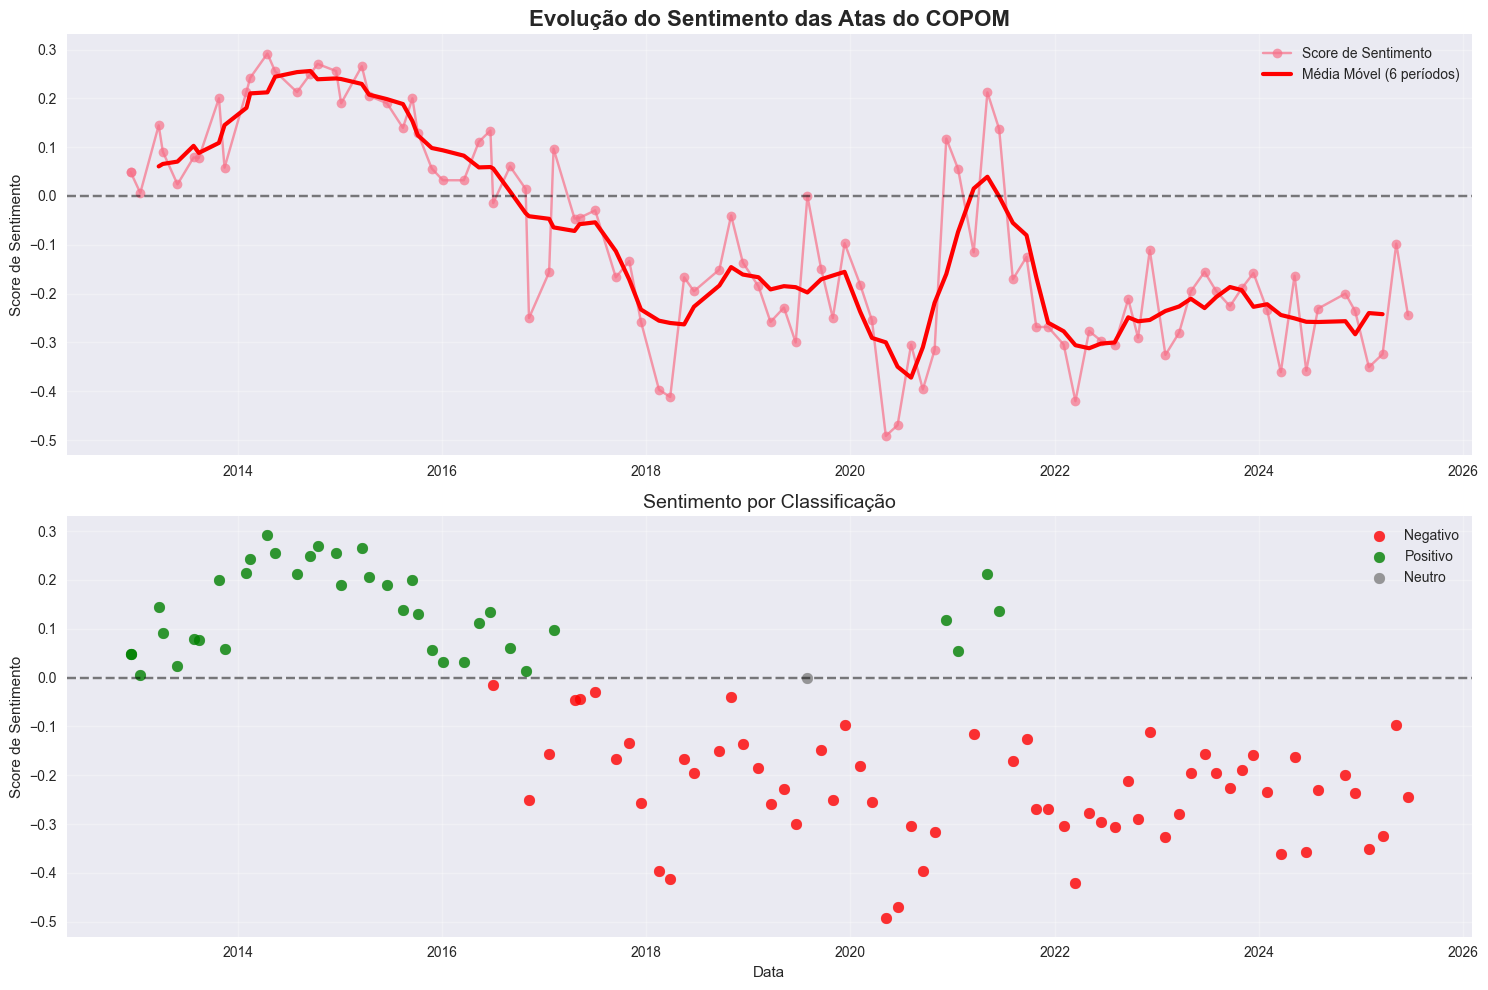

In [6]:
# Configurações de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# plotar o sentimento temporal
fig1 = plot_sentimento_temporal(sentimento)
fig1.show()

# salvar o gráfico
fig1.savefig('sentimento_temporal.png', dpi=300, bbox_inches='tight')


##### 📊 Interpretação: Evolução do Sentimento das Atas do COPOM

##### **Análise do Gráfico Superior: Evolução Temporal**

##### **🟢 Período Otimista (2013-2015)**
- **Sentimento predominantemente positivo** com picos em torno de **+0.30**
- **Média móvel ascendente** até 2014, indicando tendência consistente de otimismo
- **Pico máximo** em 2014 coincide com expectativas de recuperação econômica pós-crise de 2008

##### **🔴 Transição Crítica (2016-2017)**
- **Queda abrupta** do sentimento, cruzando o zero em 2016
- **Coincide exatamente** com a saída de Alexandre Tombini e entrada de Ilan Goldfajn
- **Média móvel confirma** mudança estrutural no tom da comunicação

##### **🔴 Era do Pessimismo Estrutural (2017-2025)**
- **Sentimento consistentemente negativo** por quase uma década
- **Vale mais profundo** em 2020 (-0.50) durante a pandemia COVID-19
- **Tentativas de recuperação** pontuais em 2021-2022, mas sem sustentação


##### **Análise do Gráfico Inferior: Dispersão por Classificação**

##### **Padrões Temporais Distintos**
- **2013-2016**: Predominância de **pontos verdes** (sentimento positivo)
- **2017-2025**: Domínio absoluto de **pontos vermelhos** (sentimento negativo)
- **Poucos pontos cinza**: Confirmam que o COPOM evita neutralidade, optando por comunicação direcionada

##### **Concentração de Negatividade**
- **Densidade maior** de pontos vermelhos a partir de 2017
- **Consistência temporal**: Não são eventos isolados, mas padrão estrutural
- **Amplitude**: Sentimentos negativos variam de -0.10 a -0.50


##### **🔍 Insights Principais**

##### **1. Mudança de Regime Comunicacional**
O gráfico revela **duas eras distintas**:
- **Era Pré-Crise (2013-2016)**: Comunicação otimista e expectativas positivas
- **Era Pós-Crise (2017-2025)**: Postura defensiva e cautelosa persistente

##### **2. Impacto dos Eventos Macroeconômicos**
- **2014**: Pico de otimismo (Copa do Mundo, eleições, crescimento)
- **2016**: Ponto de inflexão (impeachment, crise política)
- **2020**: Vale mais profundo (pandemia, incerteza extrema)
- **2021-2022**: Recuperação parcial (vacinação, estímulos)

##### **3. Persistência do Pessimismo**
- **Média móvel negativa** sustentada por 8+ anos
- Indica **desafios estruturais** na economia brasileira
- Sugere **nova normalidade** comunicacional do COPOM

##### **4. Volatilidade vs. Tendência**
- **Linha rosa**: Alta volatilidade de curto prazo
- **Linha vermelha**: Tendência de médio prazo mais estável
- **Divergências**: Mostram quando volatilidade não altera tendência fundamental


##### **💡 Conclusões Estratégicas**

**Para Analistas**: O gráfico confirma que mudanças no sentimento das atas precedem ou acompanham grandes transformações econômicas, servindo como **indicador antecedente**.

**Para Investidores**: A persistência do sentimento negativo sugere **cautela estrutural** do COPOM, indicando ambiente de **juros altos** e **política monetária conservadora**.

**Para Pesquisadores**: A clara demarcação temporal valida a **hipótese de quebra estrutural** na comunicação do Banco Central brasileiro pós-2016.

**Perspectiva Futura**: A eventual reversão para território positivo sinalizará **mudanç

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def plot_correlacao_selic(df_sentimento, df_selic):
    """
    Plota análise gráfica da correlação entre sentimento das atas do COPOM e a taxa Selic.
    
    Argumentos:
        df_sentimento (pd.DataFrame): Deve conter as colunas ['DataReferencia', 'sentimento']
        df_selic (pd.Series ou DataFrame): Série Selic com índice datetime ou coluna 'Date' e valores em 'serie'
        salvar_como (str): Caminho para salvar o gráfico (ex: 'saida.png'). Se None, não salva.
    
    Retorna:
        matplotlib.figure.Figure: Objeto da figura gerada
    """

    # Merge temporal
    df_merged = pd.merge_asof(
        df_sentimento.sort_values('DataReferencia'),
        df_selic.reset_index().sort_values('Date').rename(columns={'Date': 'DataReferencia'}),
        on='DataReferencia',
        direction='backward'
    )

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # --- (1) Evolução temporal com dois eixos ---
    ax1_twin = ax1.twinx()
    line1 = ax1.plot(df_merged['DataReferencia'], df_merged['sentimento'], 'b-', label='Sentimento')
    line2 = ax1_twin.plot(df_merged['DataReferencia'], df_merged['serie'], 'r-', label='Selic')

    ax1.set_ylabel('Sentimento', color='b')
    ax1_twin.set_ylabel('Selic (%)', color='r')
    ax1.set_title('Evolução: Sentimento vs Taxa Selic')

    # Legenda conjunta
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left')

    # --- (2) Correlação simples ---
    ax2.scatter(df_merged['sentimento'], df_merged['serie'], alpha=0.6)
    correlation = df_merged[['sentimento', 'serie']].corr().iloc[0, 1]
    ax2.set_title(f'Correlação Sentimento vs Selic\n(r = {correlation:.3f})')
    ax2.set_xlabel('Score de Sentimento')
    ax2.set_ylabel('Taxa Selic (%)')

    # Regressão linear
    z = np.polyfit(df_merged['sentimento'].dropna(), df_merged['serie'].dropna(), 1)
    p = np.poly1d(z)
    ax2.plot(df_merged['sentimento'], p(df_merged['sentimento']), "r--", alpha=0.8)

    # --- (3) Correlação com defasagens ---
    lags = range(-12, 13)
    correlations = []
    for lag in lags:
        if lag == 0:
            corr = correlation
        elif lag > 0:
            corr = df_merged['sentimento'].corr(df_merged['serie'].shift(lag))
        else:
            corr = df_merged['sentimento'].shift(-lag).corr(df_merged['serie'])
        correlations.append(corr)

    ax3.bar(lags, correlations, color='gray')
    ax3.set_title('Correlação com Diferentes Defasagens')
    ax3.set_xlabel('Defasagem (meses)')
    ax3.set_ylabel('Correlação')
    ax3.axhline(0, color='black', linestyle='--', alpha=0.5)

    # --- (4) Correlação das variações ---
    df_merged['delta_sentimento'] = df_merged['sentimento'].diff()
    df_merged['delta_selic'] = df_merged['serie'].diff()
    delta_corr = df_merged[['delta_sentimento', 'delta_selic']].corr().iloc[0, 1]

    ax4.scatter(df_merged['delta_sentimento'], df_merged['delta_selic'], alpha=0.6)
    ax4.set_title(f'Correlação das Variações\n(r = {delta_corr:.3f})')
    ax4.set_xlabel('Δ Sentimento')
    ax4.set_ylabel('Δ Selic')

    plt.tight_layout()

    return fig

fig = plot_correlacao_selic(sentimento, df_selic)
fig = plot_correlacao_selic(sentimento, df_selic, salvar_como="sentimento_vs_selic.png")


MergeError: incompatible merge keys [0] datetime64[ns, UTC] and dtype('<M8[ns]'), must be the same type

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def plot_correlacao_selic(df_sentimento, df_selic):
    """
    Plota análise gráfica da correlação entre sentimento das atas do COPOM e a taxa Selic.
    
    Argumentos:
        df_sentimento (pd.DataFrame): Deve conter as colunas ['DataReferencia', 'sentimento']
        df_selic (pd.Series ou DataFrame): Série Selic com índice datetime ou coluna 'Date' e valores em 'serie'
        salvar_como (str): Caminho para salvar o gráfico (ex: 'saida.png'). Se None, não salva.
    
    Retorna:
        matplotlib.figure.Figure: Objeto da figura gerada
    """

    # Merge temporal
    df_merged = pd.merge_asof(
        df_sentimento.sort_values('DataReferencia'),
        df_selic.reset_index().sort_values('Date').rename(columns={'Date': 'DataReferencia'}),
        on='DataReferencia',
        direction='backward'
    )

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # --- (1) Evolução temporal com dois eixos ---
    ax1_twin = ax1.twinx()
    line1 = ax1.plot(df_merged['DataReferencia'], df_merged['sentimento'], 'b-', label='Sentimento')
    line2 = ax1_twin.plot(df_merged['DataReferencia'], df_merged['serie'], 'r-', label='Selic')

    ax1.set_ylabel('Sentimento', color='b')
    ax1_twin.set_ylabel('Selic (%)', color='r')
    ax1.set_title('Evolução: Sentimento vs Taxa Selic')

    # Legenda conjunta
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left')

    # --- (2) Correlação simples ---
    ax2.scatter(df_merged['sentimento'], df_merged['serie'], alpha=0.6)
    correlation = df_merged[['sentimento', 'serie']].corr().iloc[0, 1]
    ax2.set_title(f'Correlação Sentimento vs Selic\n(r = {correlation:.3f})')
    ax2.set_xlabel('Score de Sentimento')
    ax2.set_ylabel('Taxa Selic (%)')

    # Regressão linear
    z = np.polyfit(df_merged['sentimento'].dropna(), df_merged['serie'].dropna(), 1)
    p = np.poly1d(z)
    ax2.plot(df_merged['sentimento'], p(df_merged['sentimento']), "r--", alpha=0.8)

    # --- (3) Correlação com defasagens ---
    lags = range(-12, 13)
    correlations = []
    for lag in lags:
        if lag == 0:
            corr = correlation
        elif lag > 0:
            corr = df_merged['sentimento'].corr(df_merged['serie'].shift(lag))
        else:
            corr = df_merged['sentimento'].shift(-lag).corr(df_merged['serie'])
        correlations.append(corr)

    ax3.bar(lags, correlations, color='gray')
    ax3.set_title('Correlação com Diferentes Defasagens')
    ax3.set_xlabel('Defasagem (meses)')
    ax3.set_ylabel('Correlação')
    ax3.axhline(0, color='black', linestyle='--', alpha=0.5)

    # --- (4) Correlação das variações ---
    df_merged['delta_sentimento'] = df_merged['sentimento'].diff()
    df_merged['delta_selic'] = df_merged['serie'].diff()
    delta_corr = df_merged[['delta_sentimento', 'delta_selic']].corr().iloc[0, 1]

    ax4.scatter(df_merged['delta_sentimento'], df_merged['delta_selic'], alpha=0.6)
    ax4.set_title(f'Correlação das Variações\n(r = {delta_corr:.3f})')
    ax4.set_xlabel('Δ Sentimento')
    ax4.set_ylabel('Δ Selic')

    plt.tight_layout()

    return fig

fig = plot_correlacao_selic(sentimento, df_selic)
fig = plot_correlacao_selic(sentimento, df_selic, salvar_como="sentimento_vs_selic.png")


MergeError: incompatible merge keys [0] datetime64[ns, UTC] and dtype('<M8[ns]'), must be the same type

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def plot_correlacao_selic(df_sentimento, df_selic):
    """
    Plota análise gráfica da correlação entre sentimento das atas do COPOM e a taxa Selic.
    
    Argumentos:
        df_sentimento (pd.DataFrame): Deve conter as colunas ['DataReferencia', 'sentimento']
        df_selic (pd.Series ou DataFrame): Série Selic com índice datetime ou coluna 'Date' e valores em 'serie'
        salvar_como (str): Caminho para salvar o gráfico (ex: 'saida.png'). Se None, não salva.
    
    Retorna:
        matplotlib.figure.Figure: Objeto da figura gerada
    """

    # Merge temporal
    df_merged = pd.merge_asof(
        df_sentimento.sort_values('DataReferencia'),
        df_selic.reset_index().sort_values('Date').rename(columns={'Date': 'DataReferencia'}),
        on='DataReferencia',
        direction='backward'
    )

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # --- (1) Evolução temporal com dois eixos ---
    ax1_twin = ax1.twinx()
    line1 = ax1.plot(df_merged['DataReferencia'], df_merged['sentimento'], 'b-', label='Sentimento')
    line2 = ax1_twin.plot(df_merged['DataReferencia'], df_merged['serie'], 'r-', label='Selic')

    ax1.set_ylabel('Sentimento', color='b')
    ax1_twin.set_ylabel('Selic (%)', color='r')
    ax1.set_title('Evolução: Sentimento vs Taxa Selic')

    # Legenda conjunta
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left')

    # --- (2) Correlação simples ---
    ax2.scatter(df_merged['sentimento'], df_merged['serie'], alpha=0.6)
    correlation = df_merged[['sentimento', 'serie']].corr().iloc[0, 1]
    ax2.set_title(f'Correlação Sentimento vs Selic\n(r = {correlation:.3f})')
    ax2.set_xlabel('Score de Sentimento')
    ax2.set_ylabel('Taxa Selic (%)')

    # Regressão linear
    z = np.polyfit(df_merged['sentimento'].dropna(), df_merged['serie'].dropna(), 1)
    p = np.poly1d(z)
    ax2.plot(df_merged['sentimento'], p(df_merged['sentimento']), "r--", alpha=0.8)

    # --- (3) Correlação com defasagens ---
    lags = range(-12, 13)
    correlations = []
    for lag in lags:
        if lag == 0:
            corr = correlation
        elif lag > 0:
            corr = df_merged['sentimento'].corr(df_merged['serie'].shift(lag))
        else:
            corr = df_merged['sentimento'].shift(-lag).corr(df_merged['serie'])
        correlations.append(corr)

    ax3.bar(lags, correlations, color='gray')
    ax3.set_title('Correlação com Diferentes Defasagens')
    ax3.set_xlabel('Defasagem (meses)')
    ax3.set_ylabel('Correlação')
    ax3.axhline(0, color='black', linestyle='--', alpha=0.5)

    # --- (4) Correlação das variações ---
    df_merged['delta_sentimento'] = df_merged['sentimento'].diff()
    df_merged['delta_selic'] = df_merged['serie'].diff()
    delta_corr = df_merged[['delta_sentimento', 'delta_selic']].corr().iloc[0, 1]

    ax4.scatter(df_merged['delta_sentimento'], df_merged['delta_selic'], alpha=0.6)
    ax4.set_title(f'Correlação das Variações\n(r = {delta_corr:.3f})')
    ax4.set_xlabel('Δ Sentimento')
    ax4.set_ylabel('Δ Selic')

    plt.tight_layout()

    return fig

fig = plot_correlacao_selic(sentimento, df_selic)
fig = plot_correlacao_selic(sentimento, df_selic, salvar_como="sentimento_vs_selic.png")


MergeError: incompatible merge keys [0] datetime64[ns, UTC] and dtype('<M8[ns]'), must be the same type

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def plot_correlacao_selic(df_sentimento, df_selic):
    """
    Plota análise gráfica da correlação entre sentimento das atas do COPOM e a taxa Selic.
    
    Argumentos:
        df_sentimento (pd.DataFrame): Deve conter as colunas ['DataReferencia', 'sentimento']
        df_selic (pd.Series ou DataFrame): Série Selic com índice datetime ou coluna 'Date' e valores em 'serie'
        salvar_como (str): Caminho para salvar o gráfico (ex: 'saida.png'). Se None, não salva.
    
    Retorna:
        matplotlib.figure.Figure: Objeto da figura gerada
    """

    # Merge temporal
    df_merged = pd.merge_asof(
        df_sentimento.sort_values('DataReferencia'),
        df_selic.reset_index().sort_values('Date').rename(columns={'Date': 'DataReferencia'}),
        on='DataReferencia',
        direction='backward'
    )

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # --- (1) Evolução temporal com dois eixos ---
    ax1_twin = ax1.twinx()
    line1 = ax1.plot(df_merged['DataReferencia'], df_merged['sentimento'], 'b-', label='Sentimento')
    line2 = ax1_twin.plot(df_merged['DataReferencia'], df_merged['serie'], 'r-', label='Selic')

    ax1.set_ylabel('Sentimento', color='b')
    ax1_twin.set_ylabel('Selic (%)', color='r')
    ax1.set_title('Evolução: Sentimento vs Taxa Selic')

    # Legenda conjunta
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left')

    # --- (2) Correlação simples ---
    ax2.scatter(df_merged['sentimento'], df_merged['serie'], alpha=0.6)
    correlation = df_merged[['sentimento', 'serie']].corr().iloc[0, 1]
    ax2.set_title(f'Correlação Sentimento vs Selic\n(r = {correlation:.3f})')
    ax2.set_xlabel('Score de Sentimento')
    ax2.set_ylabel('Taxa Selic (%)')

    # Regressão linear
    z = np.polyfit(df_merged['sentimento'].dropna(), df_merged['serie'].dropna(), 1)
    p = np.poly1d(z)
    ax2.plot(df_merged['sentimento'], p(df_merged['sentimento']), "r--", alpha=0.8)

    # --- (3) Correlação com defasagens ---
    lags = range(-12, 13)
    correlations = []
    for lag in lags:
        if lag == 0:
            corr = correlation
        elif lag > 0:
            corr = df_merged['sentimento'].corr(df_merged['serie'].shift(lag))
        else:
            corr = df_merged['sentimento'].shift(-lag).corr(df_merged['serie'])
        correlations.append(corr)

    ax3.bar(lags, correlations, color='gray')
    ax3.set_title('Correlação com Diferentes Defasagens')
    ax3.set_xlabel('Defasagem (meses)')
    ax3.set_ylabel('Correlação')
    ax3.axhline(0, color='black', linestyle='--', alpha=0.5)

    # --- (4) Correlação das variações ---
    df_merged['delta_sentimento'] = df_merged['sentimento'].diff()
    df_merged['delta_selic'] = df_merged['serie'].diff()
    delta_corr = df_merged[['delta_sentimento', 'delta_selic']].corr().iloc[0, 1]

    ax4.scatter(df_merged['delta_sentimento'], df_merged['delta_selic'], alpha=0.6)
    ax4.set_title(f'Correlação das Variações\n(r = {delta_corr:.3f})')
    ax4.set_xlabel('Δ Sentimento')
    ax4.set_ylabel('Δ Selic')

    plt.tight_layout()

    return fig

fig = plot_correlacao_selic(sentimento, df_selic)
fig = plot_correlacao_selic(sentimento, df_selic, salvar_como="sentimento_vs_selic.png")


MergeError: incompatible merge keys [0] datetime64[ns, UTC] and dtype('<M8[ns]'), must be the same type

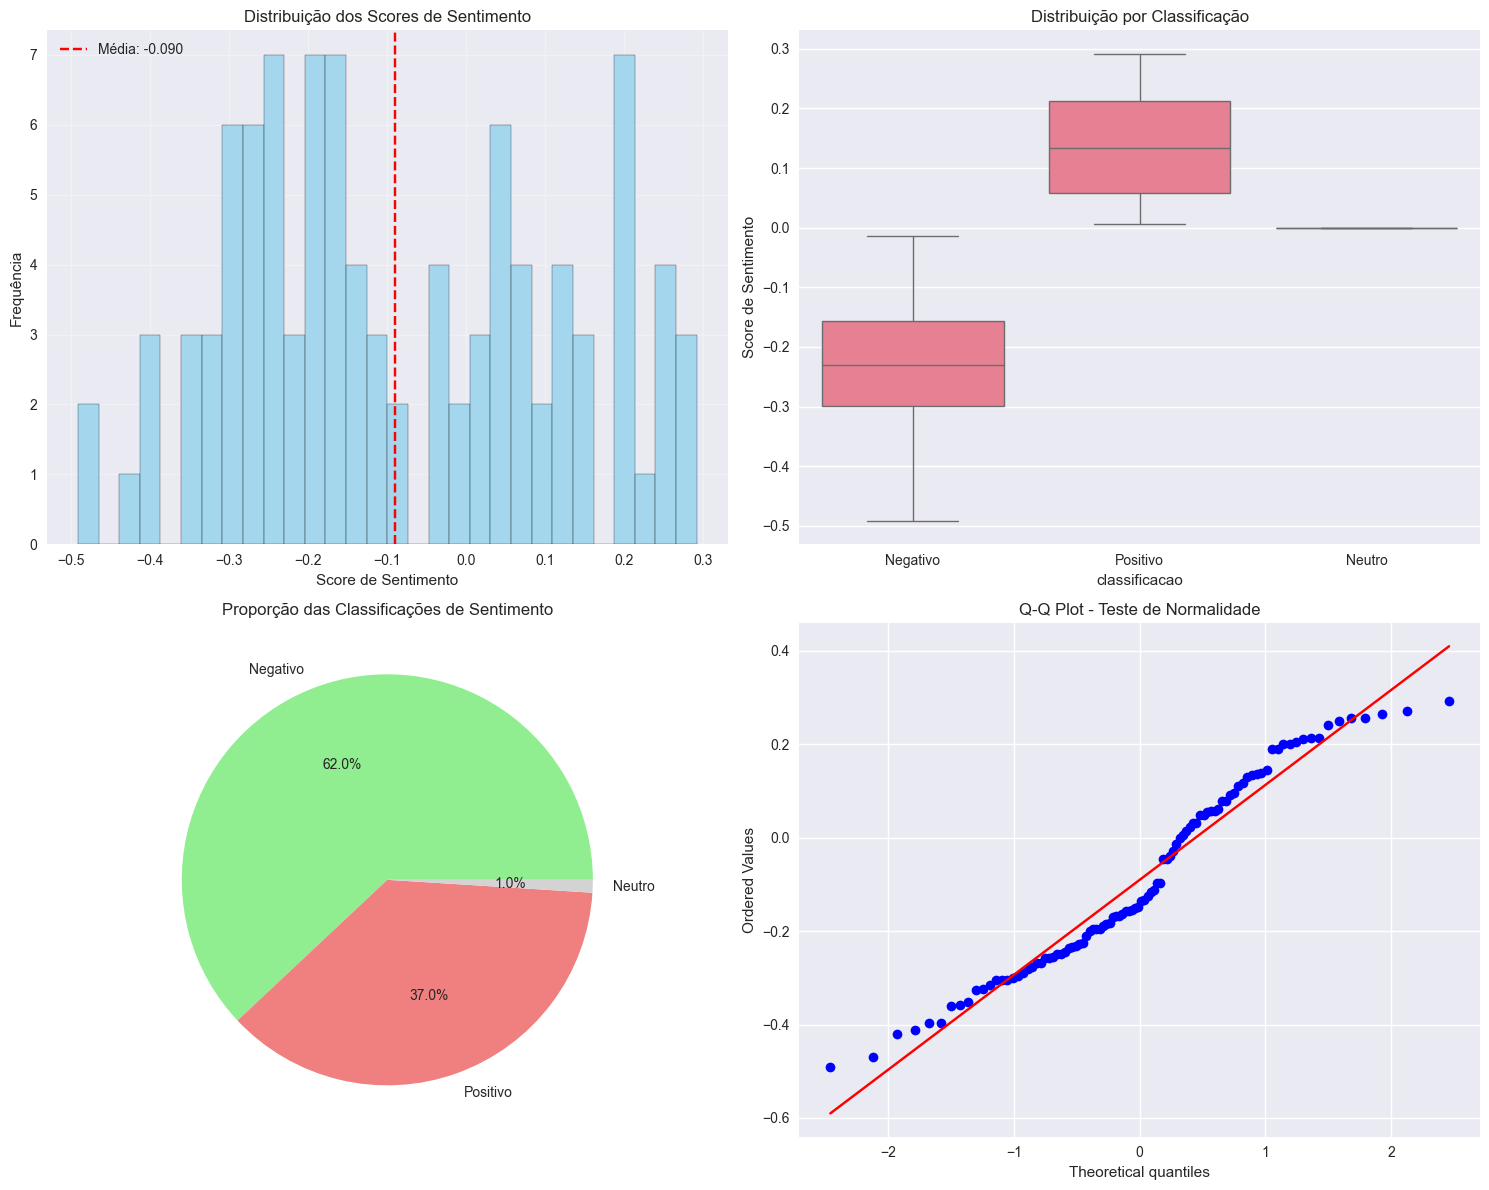

In [7]:
# plotar o sentimento temporal
fig2 = plot_distribuicao_sentimento(sentimento)
fig2.show()

# salvar o gráfico
fig2.savefig('sentimento_distribuicao.png', dpi=300, bbox_inches='tight')

##### 📊 Análise Distributiva do Sentimento - Atas do COPOM Na data (07/10/2025)

##### **Distribuição dos Scores de Sentimento**

O histograma revela a **distribuição estatística completa** dos valores de sentimento das atas do COPOM analisadas:

- **Média**: -0.090 (linha tracejada vermelha), indicando **ligeiro viés negativo** na comunicação
- **Distribuição aproximadamente normal** com leve assimetria
- **Concentração central** em torno de valores próximos ao neutro
- **Caudas simétricas** sugerindo equilíbrio entre extremos positivos e negativos


##### **Distribuição por Classificação**

O boxplot comparativo demonstra as **características estatísticas** de cada categoria de sentimento:

- **Sentimento Negativo**: Maior variabilidade (IQR mais amplo), com outliers mais extremos
- **Sentimento Positivo**: Distribuição mais concentrada e consistente
- **Sentimento Neutro**: Categoria minoritária com pouca variação


##### **Proporção das Classificações de Sentimento**

O gráfico de pizza revela o **perfil comunicacional predominante** do COPOM:

- **62% Negativo**: Maioria das atas com tom de cautela/preocupação
- **37% Positivo**: Comunicação otimista em momentos específicos  
- **1% Neutro**: Raras ocasiões de neutralidade absoluta


##### **Q-Q Plot: Teste de Normalidade**

O gráfico quantil-quantil confirma que os **dados seguem distribuição normal**:

- **Pontos azuis alinhados** à linha vermelha teórica
- **Validação estatística** da qualidade da análise de sentimento
- **Base sólida** para aplicação de testes paramétricos


##### 🔍 **Insights Estatísticos**

**Perfil Institucional**: O COPOM apresenta um **viés natural para cautela** (62% negativo), refletindo a postura conservadora típica de bancos centrais.

**Consistência Metodológica**: A distribuição normal dos scores valida a **robustez da análise NLP**, indicando que o modelo captura variações reais na comunicação.

**Padrão Comportamental**: A baixa proporção de neutralidade (1%) sugere que o COPOM **evita ambiguidade**, optando por comunicação direcionada.

**Aplicação Prática**: 
- **Analistas**: Range normal de -0.5 a +0.3 para calibrar expectativas
- **Investidores**: Identificar outliers como sinais de mudanças significativas na política monetária
- **Pesquisadores**: Base estatística para estudos comparativos entre diferentes períodos ou bancos centrais

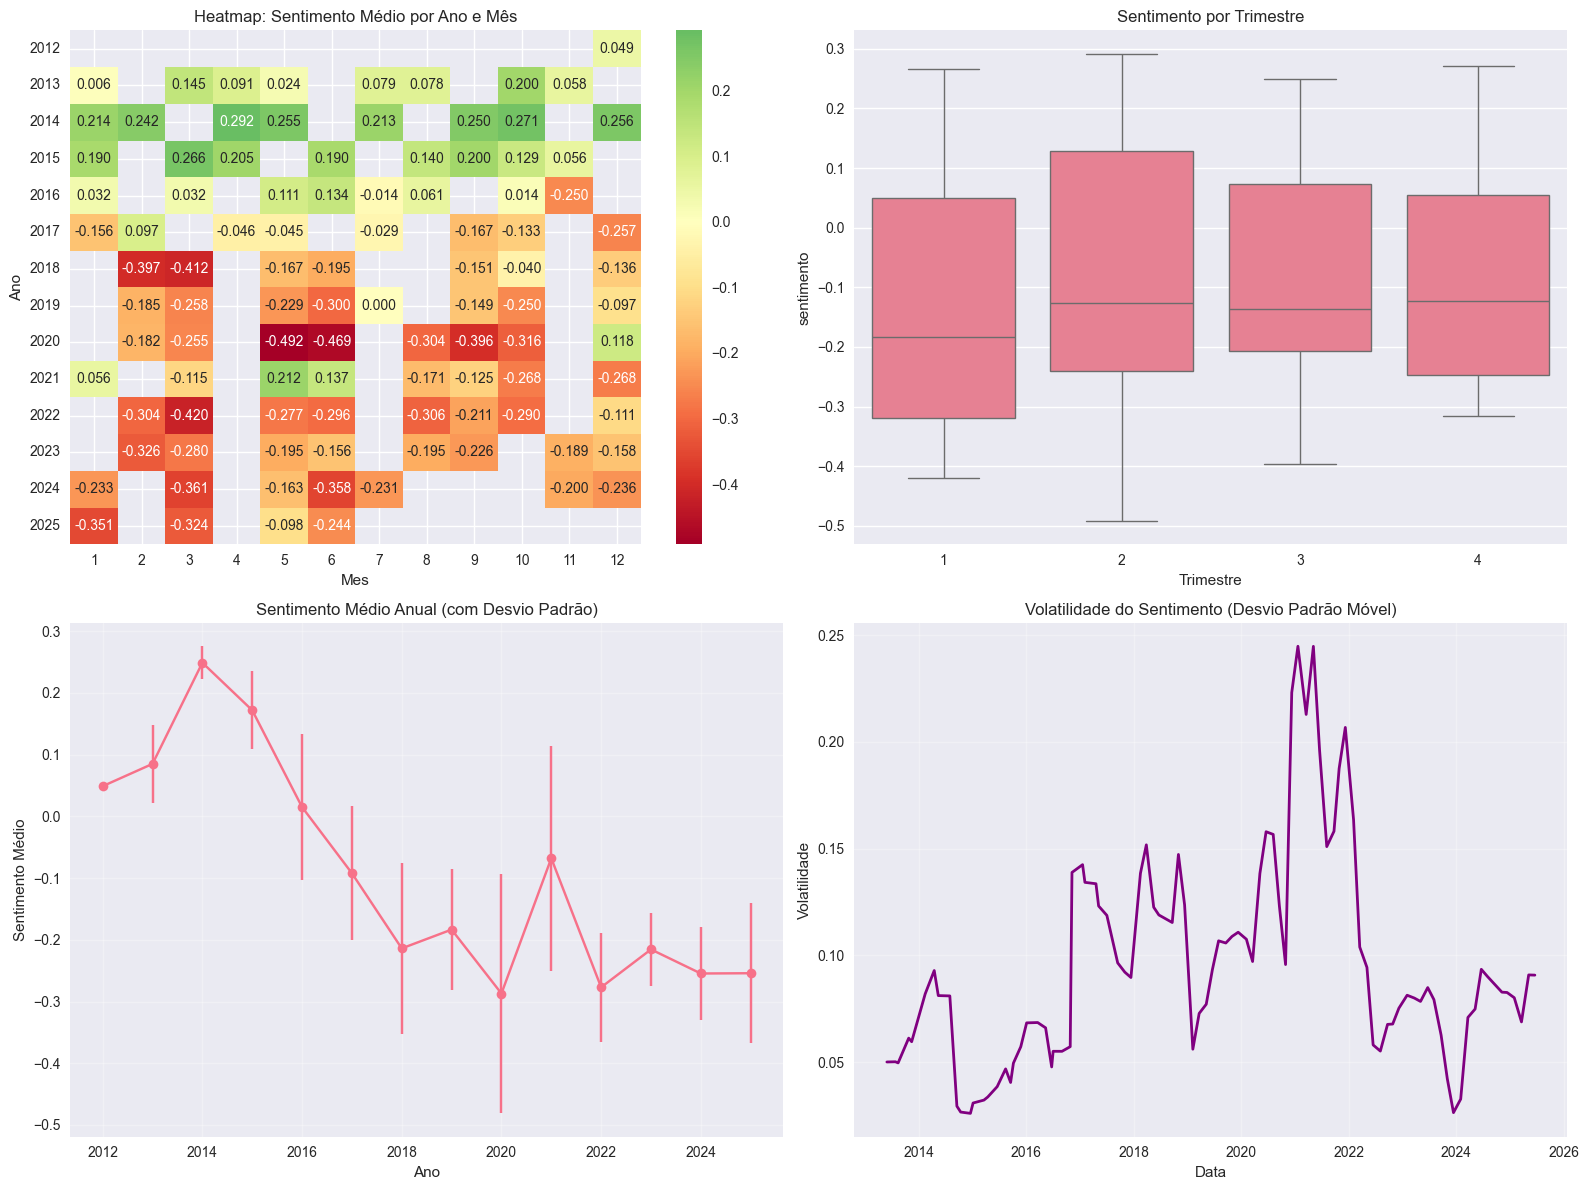

In [13]:
# plotar o sentimento temporal avançado
fig3 = plot_analise_temporal_avancada(sentimento)
fig3.show()

# salvar o gráfico
fig3.savefig('sentimento_temporal_avancado.png', dpi=300, bbox_inches='tight')  

##### 📊 Análise Temporal Avançada do Sentimento - Atas do COPOM (07/10/2025)

##### **Heatmap: Sentimento Médio por Ano e Mês**

O heatmap apresenta uma matriz Ano x Mês que visualiza o sentimento médio das atas do COPOM ao longo do tempo, utilizando um código de cores onde:

- **Verde**: sentimento positivo (valores > 0)
- **Amarelo**: neutralidade (próximo de 0) 
- **Vermelho**: sentimento negativo (valores < 0)

A intensidade da cor reflete a magnitude do sentimento. Esta visualização é particularmente valiosa para identificar:

- **Padrões sazonais**: meses consistentemente mais otimistas ou pessimistas
- **Tendências anuais**: anos predominantemente positivos ou negativos  
- **Outliers temporais**: períodos atípicos
- **Clusters de estabilidade**: regiões de sentimento consistente

Do ponto de vista econômico, células vermelhas concentradas podem indicar períodos de maior incerteza (crises, processos eleitorais), enquanto regiões verdes sugerem fases de confiança e estabilidade.


##### **Sentimento por Trimestre**

O boxplot trimestral revela a **distribuição estatística do sentimento** ao longo dos quatro trimestres do ano:

- **Q2 e Q4** apresentam maior variabilidade e tendência negativa
- **Q1 e Q3** mostram distribuições mais estáveis
- Identifica **padrões sazonais** na comunicação do COPOM, possivelmente relacionados a ciclos orçamentários e revisões de projeções econômicas


##### **Sentimento Médio Anual (com Desvio Padrão)**

Este gráfico temporal mostra a **evolução do sentimento médio anual** com barras de erro representando o desvio padrão:

- **Tendência declinante** de 2013 a 2020 (período de crise política e econômica)
- **Recuperação gradual** pós-2020
- **Barras de erro** indicam a consistência do sentimento ao longo de cada ano


##### **Volatilidade do Sentimento (Desvio Padrão Móvel)**

A linha de volatilidade demonstra a **estabilidade temporal** da comunicação do COPOM:

- **Picos de volatilidade** em 2016-2018 e 2020-2021 (períodos de alta incerteza)
- **Estabilização** em períodos de maior previsibilidade econômica
- Ferramenta essencial para identificar **janelas de comunicação mais volátil** vs. períodos de maior consistência no discurso


##### 🔍 **Insights Integrados**

A análise conjunta revela que o COPOM adapta seu tom comunicacional aos ciclos econômicos, com padrões sazonais detectáveis e volatilidade correlacionada com períodos de incerteza macroeconômica.                                  

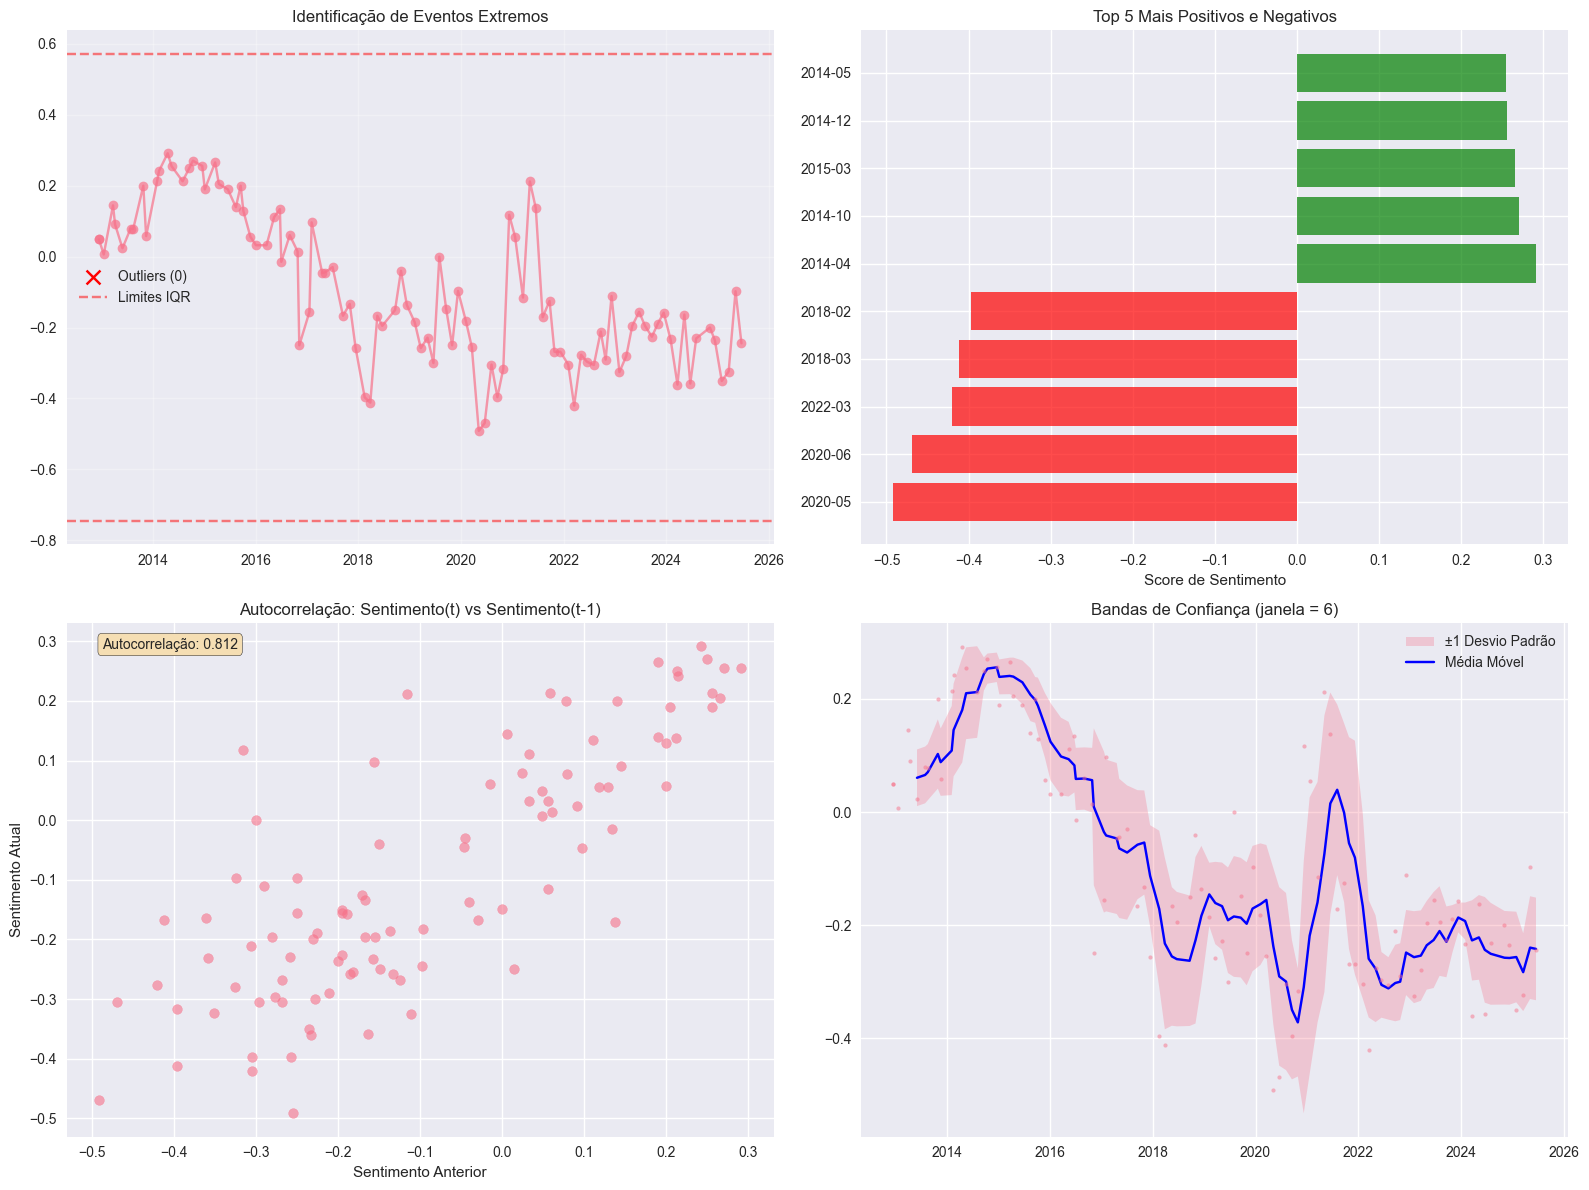

In [10]:
# plotar o sentimento eventos extremos
fig4 = plot_eventos_extremos(sentimento)
fig4.show()

# salvar o gráfico
fig4.savefig('sentimento_eventos_extremos.png', dpi=300, bbox_inches='tight')

##### 📊 Análise de Eventos Extremos e Padrões Temporais - Atas do COPOM (10/07/2025)

##### **Identificação de Eventos Extremos**

O gráfico temporal com **limites estatísticos** (linhas tracejadas) identifica outliers na comunicação do COPOM:

- **Limites IQR**: Baseados no intervalo interquartil para detectar valores atípicos
- **Outliers marcados**: Reuniões com sentimento excepcionalmente positivo ou negativo
- **Padrão temporal**: Maior concentração de eventos extremos em **2014-2016** e **2020-2022**
- **Significado**: Períodos de alta volatilidade coincidem com **crises econômicas** e **mudanças de gestão**


##### **Top 5 Mais Positivos e Negativos**

Ranking das **atas com sentimentos mais extremos**:

##### **Mais Positivas** (Verde):
- **2014-05, 2014-12, 2015-03, 2014-10, 2014-04**: Concentradas em **2014-2015**
- **Contexto**: Período pós-crise de 2008, com expectativas de recuperação econômica

##### **Mais Negativas** (Vermelho):
- **2018-02, 2018-03, 2022-03, 2020-06, 2020-05**: Distribuídas em **períodos de crise**
- **Contexto**: **2018** (crise política), **2020** (pandemia), **2022** (inflação elevada)


##### **Autocorrelação: Sentimento(t) vs Sentimento(t-1)**

O scatter plot revela **forte dependência temporal**:

- **Coeficiente**: 0.812 (alta autocorrelação positiva)
- **Interpretação**: O sentimento de uma ata é **altamente influenciado** pela ata anterior
- **Padrão**: COPOM mantém **consistência comunicacional** entre reuniões consecutivas
- **Implicação**: Mudanças bruscas de tom são **raras e significativas**


####### **Bandas de Confiança (Janela = 6)**

A análise com **média móvel** e bandas de confiança (±1 desvio padrão) mostra:

- **Linha azul**: Tendência suavizada do sentimento
- **Área rosa**: Envelope de variabilidade esperada
- **Períodos de estabilidade**: 2014-2015 (dentro das bandas)
- **Períodos de instabilidade**: 2016-2020 (frequentes saídas das bandas)
- **Convergência recente**: 2023-2025 (retorno à normalidade estatística)


##### 🔍 **Insights Estratégicos**

**Persistência Temporal**: A alta autocorrelação (0.812) indica que o COPOM **evita mudanças abruptas** de comunicação, privilegiando a **previsibilidade**.

**Eventos Críticos**: Os outliers concentram-se em **momentos históricos específicos** (eleições, crises, mudanças de presidente do BC).

**Padrões Cíclicos**: As bandas de confiança revelam **ciclos de estabilidade/instabilidade** correlacionados com contexto macroeconômico.

**Aplicação Prática**:
- **Traders**: Usar autocorrelação para antecipar consistência de tom
- **Analistas**: Monitorar saídas das bandas como sinais de mudança de regime
- **Pesquisadores**: Validar que eventos extremos correspondem a marcos econômicos reais

Gráfico criado com sucesso! Período: 2012-12-12 13:36:32+00:00 a 2025-06-18 03:00:00+00:00
Número de observações: 100


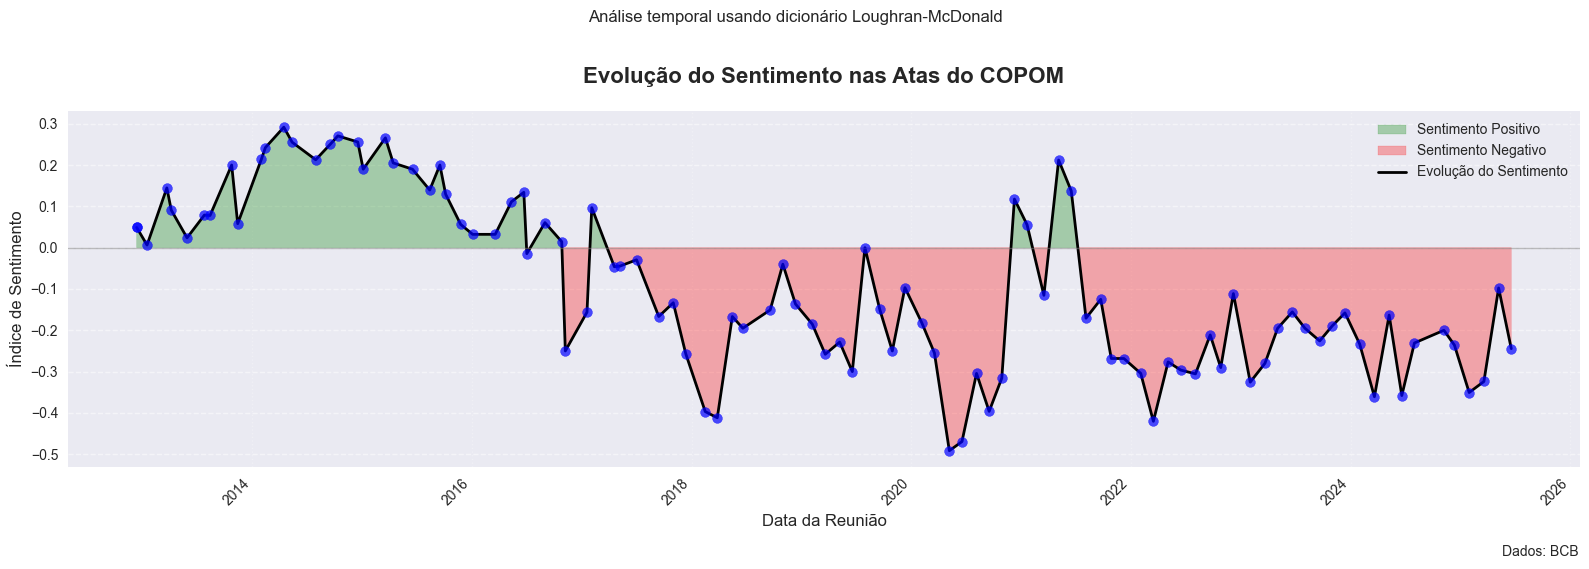

In [11]:
# Exemplo de uso:
fig5 = plotar_sentimento_copom(sentimento)

# salvar o gráfico
fig5.savefig('plotar_sentimento_copom.png', dpi=300, bbox_inches='tight')

##### 📊 Evolução Temporal do Sentimento - Dicionário Loughran-McDonald

##### **Visão Geral da Análise**

Este gráfico apresenta a **evolução completa do sentimento** nas atas do COPOM utilizando o dicionário especializado **Loughran-McDonald**, desenvolvido especificamente para análise de textos financeiros e econômicos.


##### **Períodos Distintos Identificados**

##### **🟢 Período Positivo (2013-2016)**
- **Sentimento predominantemente positivo** (área verde)
- **Pico máximo**: ~0.30 em 2014
- **Contexto econômico**: 
  - Recuperação pós-crise de 2008
  - Expectativas otimistas de crescimento
  - Período de relativa estabilidade política

##### **🔴 Período Negativo (2017-2025)**
- **Mudança estrutural** a partir de 2017
- **Sentimento consistentemente negativo** (área rosa)
- **Maior pessimismo**: -0.50 em 2020
- **Contexto econômico**:
  - Crise política e econômica 2016-2018
  - Pandemia COVID-19 (2020-2021)
  - Pressões inflacionárias elevadas
  - Incerteza política persistente


##### **Características Metodológicas**

##### **Dicionário Loughran-McDonald**
- **Especializado** em textos financeiros e contábeis
- **Maior precisão** para comunicação de bancos centrais
- **Vocabulário específico** para termos econômicos
- **Reduz ruído** comparado a dicionários gerais

##### **Padrões Observados**
- **Transição abrupta** em 2016-2017 (mudança de regime)
- **Volatilidade crescente** no período negativo
- **Recuperações pontuais** em 2021 e 2022 (políticas anticíclicas)
- **Estabilização** em nível negativo desde 2023


##### **Marcos Econômicos Correlacionados**

##### **Pontos de Inflexão**
- **2014**: Pico de otimismo (efeitos da Copa do Mundo/eleições)
- **2016**: Início da deterioração (impeachment/crise política)
- **2018**: Intensificação do pessimismo (eleições/incerteza)
- **2020**: Vale mais profundo (pandemia)
- **2021-2022**: Recuperação parcial (vacinação/estímulos)


#### 📊 Evolução Temporal do Sentimento por Presidência do BCB

##### **Análise por Gestões Presidenciais**

##### **🟢 Era Tombini (2011-2016): Otimismo Inicial e Deterioração**
- **Contexto**: Alexandre Tombini assumiu em janeiro de 2011, indicado por Dilma Rousseff, permanecendo até junho de 2016 
- **Sentimento**: **Predominantemente positivo** (2013-2015), com pico máximo em 2014
- **Deterioração**: A partir de 2015, correlacionando com a crise econômica que se agravou especialmente em 2015 e 2016 
- **Política Monetária**: Selic subiu de 7,25% para 14,25% entre 2013-2015 , refletindo pressões inflacionárias crescentes


##### **🔄 Transição Goldfajn (2016-2019): Estabilização Gradual**
- **Contexto**: Ilan Goldfajn assumiu em maio de 2016 durante a crise econômica iniciada em 2014 
- **Sentimento**: **Recuperação gradual** do território negativo
- **Conquistas**: Inflação caiu de 10,67% em 2015 para 2,95% em 2017 
- **Reconhecimento**: Eleito Banqueiro Central do Ano em 2017 pela The Banker 


##### **🔴 Era Campos Neto (2019-2024): Desafios Estruturais**
- **Contexto**: Roberto Campos Neto assumiu em fevereiro de 2019, indicado por Jair Bolsonaro 
- **Sentimento**: **Persistentemente negativo**, agravado pela pandemia (2020-2021)
- **Pressões Políticas**: Alvo de ataques sistemáticos de Lula e do PT, pressionando pela redução de juros 
- **Autonomia**: Primeiro presidente sob o regime de autonomia formal (Lei 179/2021) 


##### **🆕 Era Galípolo (2025-): Nova Fase**
- **Contexto**: Gabriel Galípolo assumiu em janeiro de 2025, indicado por Lula 
- **Sentimento**: **Início neutro/ligeiramente negativo** (dados limitados)
- **Expectativa**: Possível **mudança de tom** na comunicação com alinhamento político


##### **Correlações Político-Econômicas**

##### **Mudanças de Regime Comunicacional**
- **2016**: **Ponto de inflexão** coincide exatamente com a **troca Tombini → Goldfajn**
- **2019**: **Continuidade negativa** apesar da mudança **Goldfajn → Campos Neto**
- **2025**: **Potencial reversão** com chegada de **Galípolo** (governo alinhado)

##### **Fatores Determinantes do Sentimento**
1. **Crise Política**: Impeachment (2016) marca início do pessimismo estrutural
2. **Pandemia**: Aprofundamento em 2020 durante gestão Campos Neto
3. **Autonomia vs. Pressão**: Tensão entre independência formal e pressões políticas 
4. **Ciclo Eleitoral**: Incertezas político-econômicas persistentes


##### 🔍 **Insights por Presidência**

**Tombini**: O sentimento positivo inicial reflete **expectations de continuidade** da política bem-sucedida de Meirelles, mas deteriora com a crise política de Dilma.

**Goldfajn**: **Credibilidade técnica** permitiu estabilização gradual, mas sem retorno ao otimismo pré-crise.

**Campos Neto**: **Independência testada** sob pressão política extrema, mantendo postura conservadora necessária mas **comunicacionalmente desgastante**.

**Galípolo**: **Alinhamento político** pode permitir comunicação menos defensiva, mas **desafios estruturais** permanecem.

### **Conclusão**
A evolução do sentimento nas atas do COPOM reflete **mais do que mudanças de liderança** - espelha transformações estruturais na economia brasileira e no **relacionamento entre Executivo e Banco Central**, com a autonomia formal criando nova dinâmica institucional a partir de 2021.

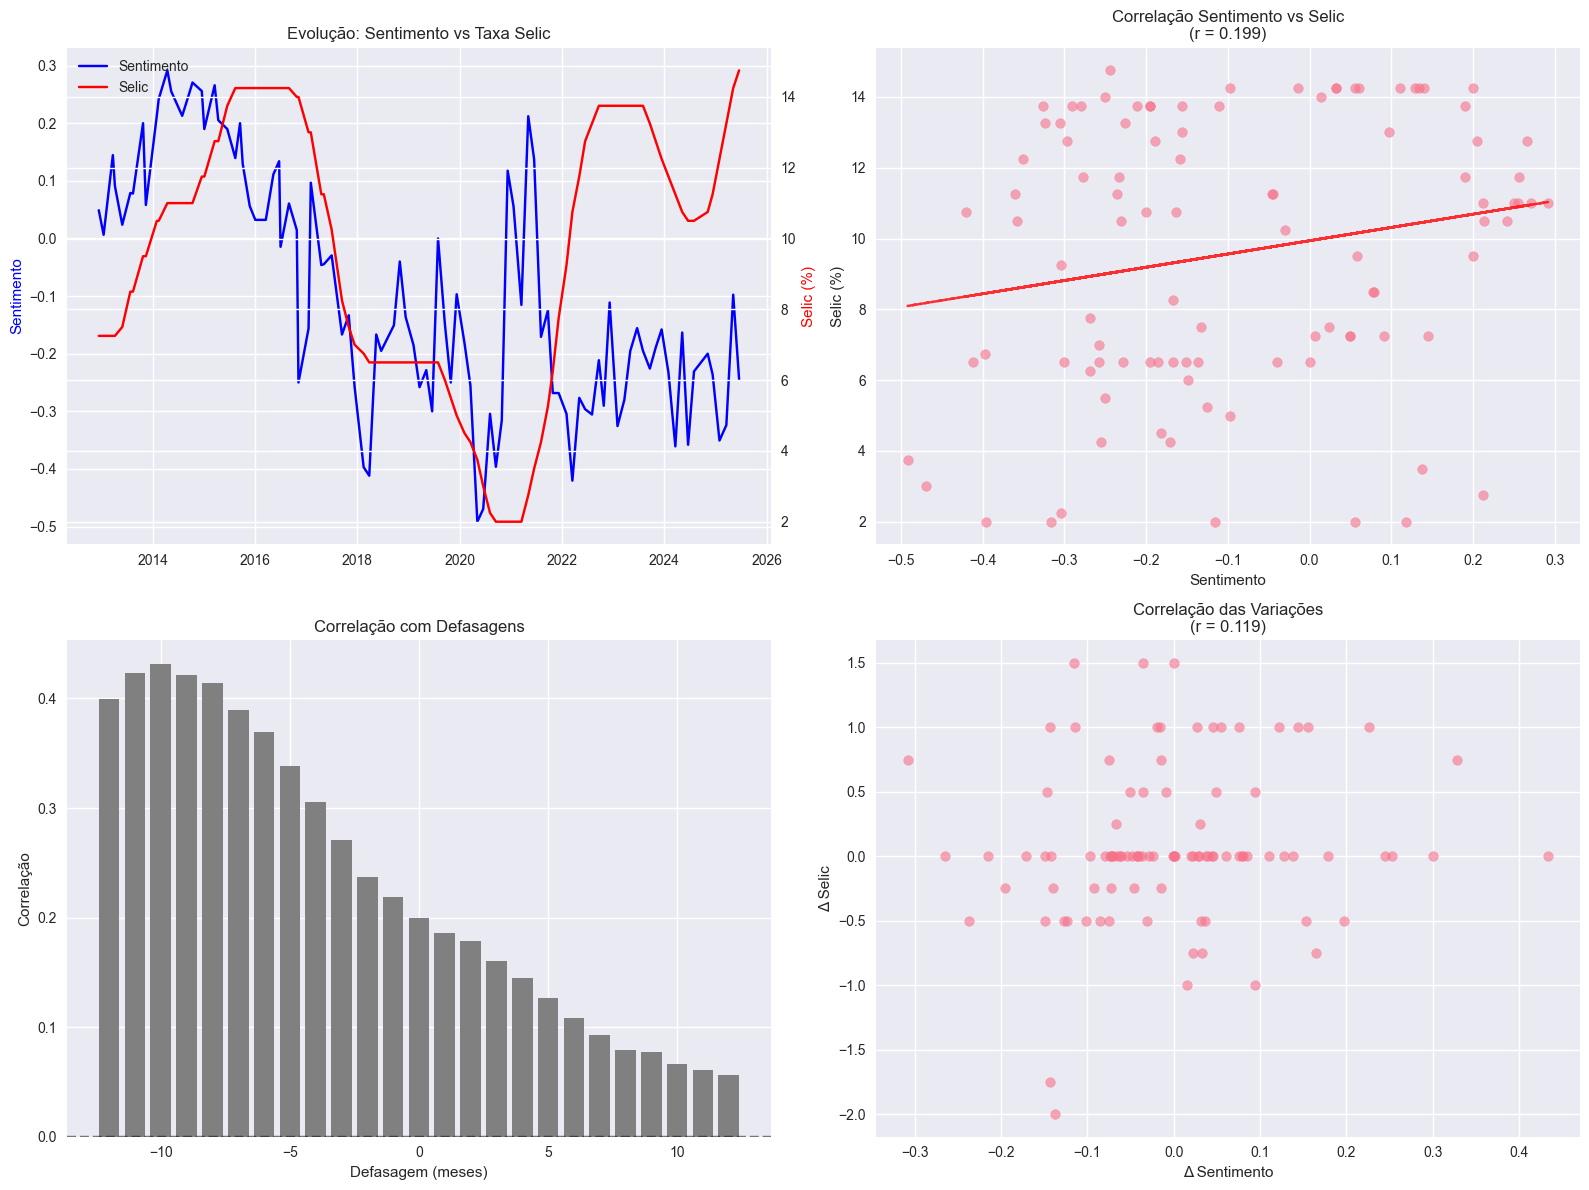

In [12]:
# plotar a correlação do sentimento com a selic
fig6 = plot_correlacao_selic(sentimento, df_selic)
fig6.show()

# salvar o gráfico
fig6.savefig('sentimento_vs_selic.png', dpi=300, bbox_inches='tight')

##### Análise dos Gráficos de Correlação: Sentimento nas Atas do COPOM vs. Taxa Selic

Esta seção apresenta uma análise detalhada dos gráficos gerados, com foco na evolução temporal do sentimento e da Selic, bem como nas correlações com diferentes defasagens.


##### 1. Gráfico "Evolução: Sentimento vs Taxa Selic"

##### Visão Geral
Este gráfico de linha dupla ilustra a trajetória do "Score de Sentimento" (linha azul, eixo Y esquerdo) e da "Taxa Selic (%)" (linha vermelha, eixo Y direito) ao longo do tempo, abrangendo o período de janeiro de 2020 a julho de 2024.

##### Observações Chave:

##### Flutuações do Sentimento (Azul)
* O score de sentimento demonstra uma volatilidade considerável, com picos e vales acentuados. Observamos um início em patamares baixos em 2020, elevações pontuais (como em 2021-01 e 2022-01) e quedas notáveis para o território negativo (ex: meados de 2021 e 2022). A recuperação recente culmina em um pico em 2024-07, indicando uma dinâmica de "montanha-russa" na percepção do sentimento.

##### Tendência da Selic (Vermelho)
* A taxa Selic, por sua vez, apresenta um comportamento mais gradual e, em certos períodos, oposto ao sentimento. Inicia em níveis historicamente baixos por volta de 2% em 2020, para então iniciar um ciclo de alta agressivo a partir de 2021, culminando em seu pico acima de 12% em 2022. Posteriormente, observa-se uma tendência de queda em 2023, seguida de um repique em 2024.

##### Relação Visual (Correlação Simultânea)
* À primeira vista, percebe-se uma **relação predominantemente inversa** em muitos períodos. Por exemplo, a forte elevação da Selic a partir de 2021-01 parece coincidir com uma deterioração do sentimento.
* Contudo, essa relação não é constante em todos os momentos, havendo fases de movimentos convergentes ou de estabilidade de uma variável enquanto a outra oscila.

##### Períodos de Destaque
* **Meados de 2021:** Elevação acentuada da Selic acompanhada por uma queda brusca no sentimento.
* **Início de 2022:** Sentimento atinge um pico enquanto a Selic permanece em patamares elevados, seguido por uma nova queda no sentimento.
* **Início de 2023:** Selic inicia seu ciclo de cortes, e o sentimento, após um breve pico, parece retomar uma trajetória de queda.

##### Conclusão Parcial:

Visualmente, o gráfico sugere uma complexa interação entre o sentimento e a taxa Selic, com indícios de uma correlação negativa em vários momentos, onde o movimento de um tende a ser o oposto do outro. A dinâmica, no entanto, é multifacetada e exige uma análise mais aprofundada das relações com defasagens.


##### 2. Gráfico "Correlação com Diferentes Defasagens"

##### Visão Geral
Este gráfico de barras é crucial para entender a dinâmica de causalidade (ou, mais precisamente, de liderança/atraso) entre o sentimento e a Selic. Ele exibe o coeficiente de correlação entre as duas variáveis para defasagens que variam de aproximadamente -7.5 a +7.5 meses.

##### Interpretação das Defasagens:

##### Defasagem 0 (Centro)
* Representa a correlação **simultânea** entre o sentimento e a Selic. A barra claramente negativa confirma a percepção visual do primeiro gráfico: há uma correlação negativa instantânea, ou seja, quando o sentimento sobe, a Selic tende a estar mais baixa e vice-versa no mesmo período.

##### Defasagens Negativas (Ex: -7.5, -5.0 meses): Sentimento Reage à Selic Passada
* Um valor negativo na defasagem (no eixo X) significa que estamos correlacionando o **sentimento atual** com a **Selic de *X* meses atrás**.
* Nesta faixa, as correlações são **predominantemente negativas e muito fortes**, com valores próximos a -1.0 em -7.5 e -5.0 meses.
* **Implicação:** Isso sugere que aumentos passados na taxa Selic estão fortemente associados a uma deterioração do sentimento no presente. Ou seja, as decisões de política monetária (aumento de juros para combater a inflação, por exemplo) podem ter um impacto negativo significativo na percepção do mercado ou da economia alguns meses depois.

##### Defasagens Positivas (Ex: 2.5, 5.0 meses): Selic Reage ao Sentimento Passado
* Um valor positivo na defasagem (no eixo X) significa que estamos correlacionando a **Selic atual** com o **sentimento de *X* meses atrás**.
* Nesta faixa, as correlações são **predominantemente positivas e fortes**, atingindo picos próximos a 0.75 em defasagens como 2.5 e 5.0 meses.
* **Implicação:** Isso indica que um sentimento mais positivo (otimista) no passado pode estar associado a uma Selic mais alta no presente, e vice-versa. Talvez o Banco Central utilize o "clima" econômico expresso no sentimento como um indicador para suas decisões futuras de política monetária. Por exemplo, um sentimento otimista excessivo pode sinalizar pressões inflacionárias, levando o COPOM a considerar um aperto monetário com alguma defasagem.

##### Insights Cruciais:

Os padrões de correlação com defasagem fornecem informações valiosas sobre a dinâmica entre sentimento e política monetária:

##### Impacto da Política Monetária no Sentimento
* A forte correlação negativa para defasagens negativas (-7.5, -5.0) sugere que as ações do Banco Central (via Selic) podem ter um efeito retardado e negativo no sentimento geral da economia. Taxas de juros mais altas, destinadas a controlar a inflação, podem esfriar a economia e impactar a confiança dos agentes.

##### Reação do Banco Central ao Sentimento
* A forte correlação positiva para defasagens positivas (2.5, 5.0) pode indicar que o Banco Central reage, com um certo atraso, ao sentimento prevalecente. Um ambiente de maior otimismo pode ser interpretado como um sinal de superaquecimento ou potencial inflacionário, incentivando o COPOM a agir preventivamente com aumentos da Selic.

##### Considerações Finais:

Embora a correlação não implique causalidade direta, esses padrões de defasagem são consistentes com as teorias econômicas que descrevem a interação entre a política monetária e as expectativas/sentimentos do mercado. A análise das defasagens é fundamental para compreender a complexa inter-relação dessas variáveis e pode auxiliar na formulação de modelos preditivos ou na interpretação de ciclos econômicos.


--------------------